# About the Data

## Description

This data set is from the [New Zealand Government](https://www.stats.govt.nz/), and it details all electronic card transactions through February 2022.

## Where to Find

The data, along with other NZ datasets, can be downloaded from https://www.stats.govt.nz/large-datasets/csv-files-for-download/

## Questions to Answer

Here are some questions from a first glance at this data:

1. How much has been spent on each purchase over the liftime of this data?
2. What has been the increase in purchase amounts for `ECTA.S19A1` over the lifetime of this data?

## Importing the Data

In [42]:
import pandas as pd
df = pd.read_csv('electronic-card-transactions-february-2022-csv-tables.csv')

## Describing the Data with Pandas

In [43]:
df.describe()

,Period,Data_value,Magnitude,Series_title_4,Series_title_5
count,18456.000000,1.688700e+04,18456.000000,0.0,0.0
mean,2011.315068,1.543755e+07,4.207737,NaN,NaN
std,6.008214,8.419977e+07,2.746230,NaN,NaN
min,2000.010000,-5.130000e+01,0.000000,NaN,NaN
25%,2006.090000,1.764000e+02,0.000000,NaN,NaN
50%,2011.090000,1.172900e+03,6.000000,NaN,NaN
75%,2016.120000,4.225750e+03,6.000000,NaN,NaN
max,2022.020000,1.874441e+09,6.000000,NaN,NaN


## Data Analysis

Let's first get an array of all the columns and the index array

In [45]:
cols = df.columns
indecies = df.index
print('Columns:', cols)
print('Indecies: ', indecies)
df

Columns: Index(['Series_reference', 'Period', 'Data_value', 'Suppressed', 'STATUS',
       'UNITS', 'Magnitude', 'Subject', 'Group', 'Series_title_1',
       'Series_title_2', 'Series_title_3', 'Series_title_4', 'Series_title_5'],
      dtype='object')
Indecies:  RangeIndex(start=0, stop=18456, step=1)


,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,ECTA.S19A1,2001.03,2462.5,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
1,ECTA.S19A1,2002.03,17177.2,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
2,ECTA.S19A1,2003.03,22530.5,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
3,ECTA.S19A1,2004.03,28005.1,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
4,ECTA.S19A1,2005.03,30629.6,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18451,ECTQ.S4AXP,2020.12,38.6,NaN,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,Proportion (%),NaN,NaN
18452,ECTQ.S4AXP,2021.03,38.4,NaN,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,Proportion (%),NaN,NaN
18453,ECTQ.S4AXP,2021.06,38.0,NaN,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,Proportion (%),NaN,NaN
18454,ECTQ.S4AXP,2021.09,34.8,NaN,F,Percent,0,Electronic Card Transactions (ANZSIC06) - ECT,Electronic card transactions by mean and propo...,Actual,Debit card usage as a proportion of total ECT ...,Proportion (%),NaN,NaN


We will now plot some simple portion of the data, specifically the `ECTA.S19A1` series reference over the given time period

<AxesSubplot:xlabel='Period', ylabel='Data_value'>

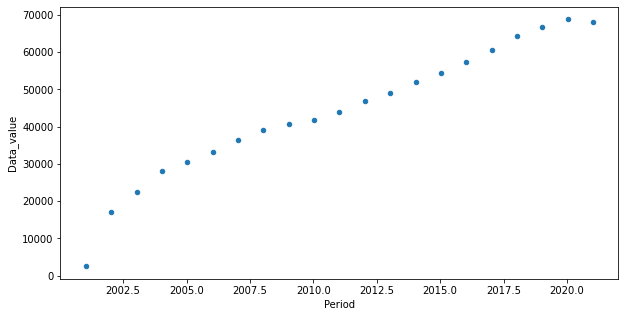

In [46]:
import matplotlib.pyplot as plt
ectas19a1 = df[df['Series_reference'] == 'ECTA.S19A1']
ectas19a1.plot(x='Period', y='Data_value', kind='scatter', figsize=(10,5))

Text(0, 0.5, 'Amount')

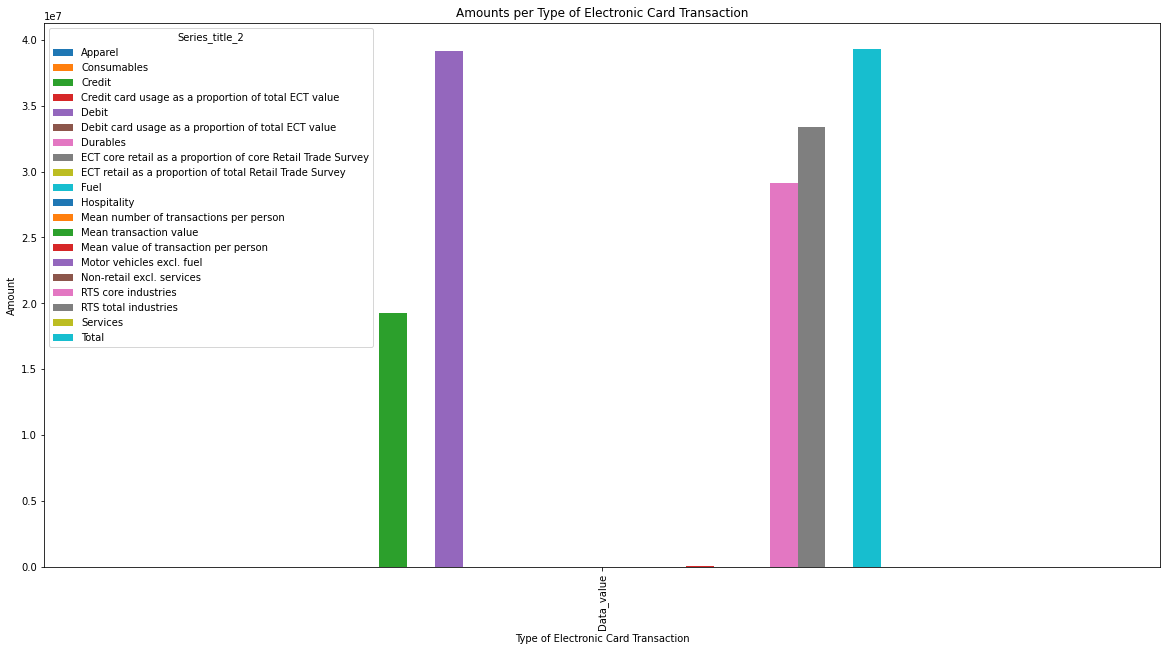

In [47]:
piv = df.pivot_table(columns='Series_title_2', values='Data_value')
piv.plot(kind='bar', figsize=(20,10))
plt.title('Amounts per Type of Electronic Card Transaction')
plt.xlabel('Type of Electronic Card Transaction')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

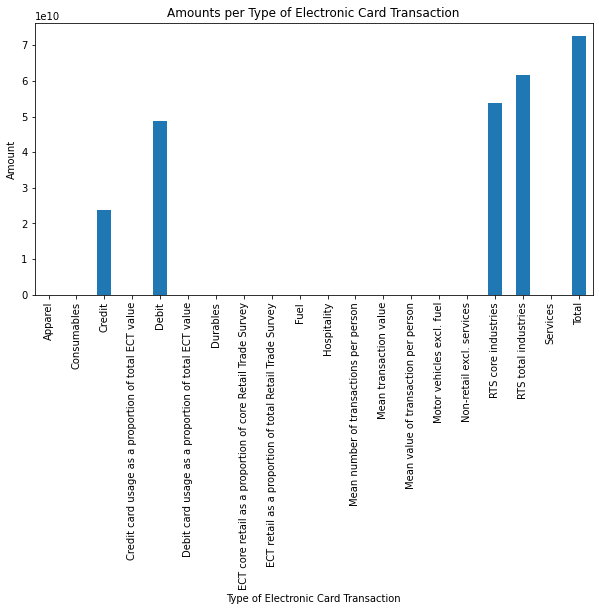

In [48]:
df.groupby('Series_title_2')['Data_value'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Amounts per Type of Electronic Card Transaction')
plt.xlabel('Type of Electronic Card Transaction')
plt.ylabel('Amount')

# Discussing the Results

In regards to each of the questions asked in the beginning:

1. Not all purchase categories have a non-trivial amount to be seen on the graph. However, notably debit and credit stand out as common transaction types, but also core industry transactions, which either have significantly more or just more logged data than transactions in consumables or fuel.
2. As expected, the amount in transactions for `ECTA.S19A1` has increased over the span of the lifetime of this data. Its shape, however, is interesting - the last few, more recent, years suggest it may no longer be linear, and may be capping or soon dropping. Could possibly be due to COVID as well.